# Projeto de Iniciação CIentífica - PIBIC

## APRENDIZADO DE MÁQUINA NA PREDIÇÃO DO BAIXO RISCO IMUNOLÓGICO PARA O TRANSPLANTE RENAL 


    UNIVERSIDADE FEDERAL DO PIAUÍ
    CAMPOS MINISTRO PETRÔNIO PORTELA
    DEPARTAMENTO DE COMPUTAÇÃO
    ORIENTADOR: PROF. LUIZ CLAUDIO DEMES DA MATA SOUSA
    COLABORADOR: PROF. VINICIUS PONTE MACHADO
    ALUNO: ISAAC SILVA SANTOS RAMOS
***

<p style="font-size:18px;">Redes sociais para contato</p>
<div style="display:flex;
            padding:10px 0px;">
    <a href="https://www.instagram.com/isaacssr.pi" target="_blank">
        <button style= "background-color: #A024AD; border:none; border-radius:5px; font-size:90%;
                        color:white;margin:0px 5px;">Instagram</button>
    </a>
    <a href="https://github.com/IsaacRamos1" target="_blank">
        <button style= "background-color: #110e12; border:none; border-radius:5px; font-size:90%;
                        color:white;margin:0px 5px;">Github</button>
    </a>
    <a href="mailto:isac_ramos1@hotmail.com" target="_blank">
        <button style= "background-color: #c21328; border:none; border-radius:5px; font-size:90%;
                        color:white;margin:0px 5px;">Email</button>
    </a>
</div>

<h3>Métodos</h3>
<p>
        Com intuito de gerarmos um dataframe bom para começar a treinar, é necessário um tratamento antes para que evite a presença de dados inconsistentes e/ou possíveis dados faltantes que iriam interferir negativamente nos resultados de treinamento e teste do projeto. Feito isso, poderemos implementar modelos de aprendizado de máquina com base nos dados presentes e analisar os melhores resultados. Neste projeto, foi separado os modelos de Árvore de Decisão, Random Forest e Rede Neural Artificial Multicamada (MLP - Multilayer-Percepron).
</p>

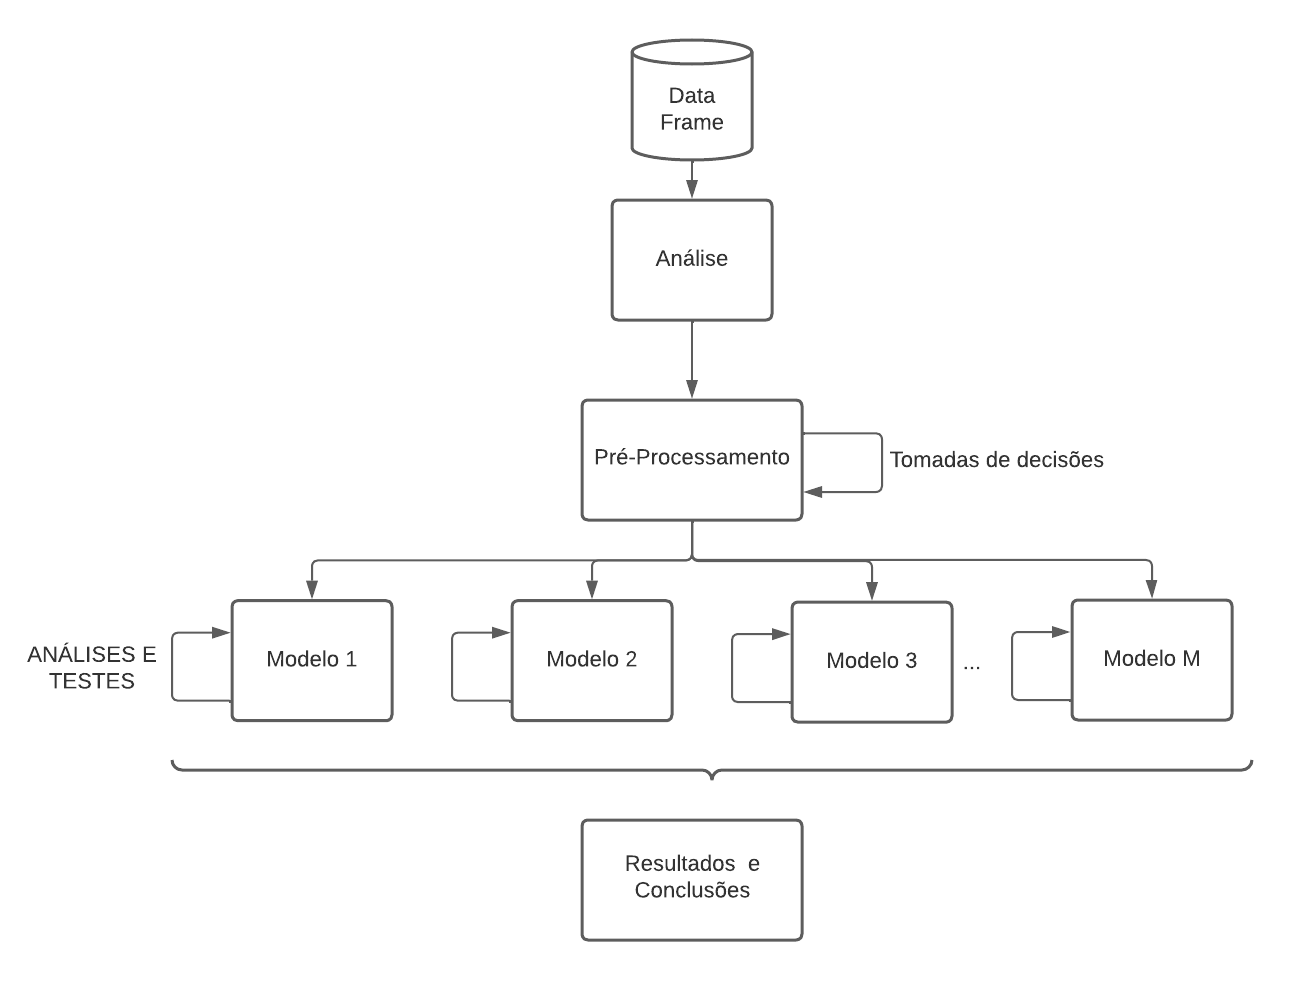

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('allvixm-val-data.csv', sep=';')

In [6]:
df.head(10)

,id,donor_id,donor_hla,patient_id,patient_cpra,patient_hla,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result
0,558716,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",71334-2660,91,"A*29:02,A*30:02,B*51:01,B*58:01,DRB1*13:01,DRB...","A*01:01,A*02:01,A*02:03,A*02:06,A*11:01,A*11:0...","DPB1*01:01,DPB1*05:01,DPB1*03:01,DPB1*06:01,DP...",1,1,0,0
1,558658,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",205670-2660,75,"A*02:01,A*02:01,B*15:16,B*40:04,DRB1*07:01,DRB...","A*01:01,A*23:01,A*24:02,A*24:03,A*80:01","DRB1*13:03,DRB1*12:02,DRB1*14:54,DRB1*14:01,DR...",-,-,1,0
2,558657,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",233572-2660,18,"A*03:01,A*23:01,B*07:02,B*07:05,DRB1*07:01,DRB...","B*35:01,B*51:01,B*53:01,B*78:01",-,1,0,1,1
3,558656,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",235844-2660,0,"A*02:01,A*30:02,B*35:01,B*45:01,DRB1*07:01,DRB...",-,-,0,0,-,0
4,558655,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",242776-2660,0,"A*03:01,A*23:01,B*35:01,B*45:01,DRB1*01:01,DRB...",-,-,0,0,-,0
5,558654,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",235944-2660,49,"A*02:01,A*74:01,B*35:01,B*50:01,DRB1*07:01,DRB...","A*23:01,A*24:02,A*24:03,A*25:01,A*29:01,B*27:0...","DRB1*03:01,DRB1*03:02,DRB1*08:01,DRB1*11:01,DR...",-,-,1,1
6,558653,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",234324-2660,0,"A*29:02,A*68:01,B*35:01,B*35:01,DRB1*07:01,DRB...",-,-,0,0,-,0
7,558652,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",237374-2660,0,"A*02:01,A*30:02,B*07:02,B*44:02,DRB1*07:01,DRB...",-,-,0,0,-,0
8,558651,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",213948-2660,6,"A*02:01,A*23:01,B*41:01,B*44:03,DRB1*07:01,DRB...",NaN,-,1,0,0,0
9,558649,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",217269-2660,0,"A*24:02,A*29:02,B*44:03,B*50:01,DRB1*07:01,DRB...",-,-,0,0,-,0


In [7]:
def classificarColuna(nome):
    data_array = [] ## array para pegar todas os dados diferentes da coluna
    dict_dif_data = {} ## dict para classificar os 196 diferentes

    for x in df[nome]:
        if x not in data_array:
            if x == 'NaN':
                continue
            else:
                data_array.append(x)
                
    print(len(data_array))
    
    count = 0
    for x in data_array:
        dict_dif_data[x] = count
        count += 1
    
    for x in range(len(df[nome])):
        if str(dict_dif_data[df[nome][x]]) == 'nan':
            continue
        else:
            df[nome][x] = str(dict_dif_data[df[nome][x]])

In [8]:
classificarColuna('patient_single_cl1')
classificarColuna('patient_single_cl2')

180
146


/home/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
df_mod = df

In [10]:
df_mod.head()

,id,donor_id,donor_hla,patient_id,patient_cpra,patient_hla,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result
0,558716,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",71334-2660,91,"A*29:02,A*30:02,B*51:01,B*58:01,DRB1*13:01,DRB...",0,0,1,1,0,0
1,558658,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",205670-2660,75,"A*02:01,A*02:01,B*15:16,B*40:04,DRB1*07:01,DRB...",1,1,-,-,1,0
2,558657,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",233572-2660,18,"A*03:01,A*23:01,B*07:02,B*07:05,DRB1*07:01,DRB...",2,2,1,0,1,1
3,558656,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",235844-2660,0,"A*02:01,A*30:02,B*35:01,B*45:01,DRB1*07:01,DRB...",3,2,0,0,-,0
4,558655,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",242776-2660,0,"A*03:01,A*23:01,B*35:01,B*45:01,DRB1*01:01,DRB...",3,2,0,0,-,0


In [11]:
def pares(iterable):
    a = iter(iterable)
    return zip(a, a)

In [12]:
for x in range(6):
    df_mod['patient_hla'+str(x)] = " "
    
for x in range(9):
    df_mod['donor_hla'+str(x)] = " "    

In [13]:
df_mod.head()

,id,donor_id,donor_hla,patient_id,patient_cpra,patient_hla,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,...,patient_hla5,donor_hla0,donor_hla1,donor_hla2,donor_hla3,donor_hla4,donor_hla5,donor_hla6,donor_hla7,donor_hla8
0,558716,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",71334-2660,91,"A*29:02,A*30:02,B*51:01,B*58:01,DRB1*13:01,DRB...",0,0,1,1,...,,,,,,,,,,
1,558658,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",205670-2660,75,"A*02:01,A*02:01,B*15:16,B*40:04,DRB1*07:01,DRB...",1,1,-,-,...,,,,,,,,,,
2,558657,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",233572-2660,18,"A*03:01,A*23:01,B*07:02,B*07:05,DRB1*07:01,DRB...",2,2,1,0,...,,,,,,,,,,
3,558656,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",235844-2660,0,"A*02:01,A*30:02,B*35:01,B*45:01,DRB1*07:01,DRB...",3,2,0,0,...,,,,,,,,,,
4,558655,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",242776-2660,0,"A*03:01,A*23:01,B*35:01,B*45:01,DRB1*01:01,DRB...",3,2,0,0,...,,,,,,,,,,


In [14]:
import time

In [15]:
def dividir_patient_hla(j):
    transform = []
    for i in range(len(df_mod)):
        patient_hla = df_mod['patient_hla'][i].split(",")
        
        if len(patient_hla) < 12:
            for z in range(12 - len(patient_hla)):
                patient_hla.append("-")
                
        for x, y in pares(patient_hla):
            transform.append([x,y])
            
        df_mod['patient_hla'+str(j)][i] = ','.join(transform[j])
        transform = []

In [16]:
def dividir_donor_hla(j):
    transform = []
    for i in range(len(df_mod)):
        donor_hla = df_mod['donor_hla'][i].split(",")
        
        if len(donor_hla) < 18:
            for z in range(18 - len(donor_hla)):
                donor_hla.append("-")
                
        for x, y in pares(donor_hla):
            transform.append([x,y])
            
        df_mod['donor_hla'+str(j)][i] = ','.join(transform[j])
        transform = []

In [17]:
for i in range(6): # vai de 0 a 5
    dividir_patient_hla(i)

/home/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [18]:
for i in range(9): # vai de 0 a 8
    dividir_donor_hla(i)

/home/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [19]:
df_mod.drop('id', inplace=True, axis=1)
df_mod.drop('donor_id', inplace=True, axis=1)
df_mod.drop('patient_id', inplace=True, axis=1)
df_mod.drop('patient_cpra', inplace=True, axis=1)
df_mod.drop('patient_hla', inplace=True, axis=1)

In [20]:
df['patient_hla0'] = df['patient_hla0'].str.replace(',','/')
df['patient_hla1'] = df['patient_hla1'].str.replace(',','/')
df['patient_hla2'] = df['patient_hla2'].str.replace(',','/')
df['patient_hla3'] = df['patient_hla3'].str.replace(',','/')
df['patient_hla4'] = df['patient_hla4'].str.replace(',','/')
df['patient_hla5'] = df['patient_hla5'].str.replace(',','/')

for i in range(9):
    df['donor_hla'+str(i)] = df['donor_hla'+str(i)].str.replace(',','/')

In [21]:
df_mod.drop('donor_hla', inplace=True, axis=1)

In [22]:
df_mod.head()

,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result,patient_hla0,patient_hla1,patient_hla2,patient_hla3,...,patient_hla5,donor_hla0,donor_hla1,donor_hla2,donor_hla3,donor_hla4,donor_hla5,donor_hla6,donor_hla7,donor_hla8
0,0,0,1,1,0,0,A*29:02/A*30:02,B*51:01/B*58:01,DRB1*13:01/DRB1*15:01,DRB3*01:01/DRB5*01:01,...,DQB1*06:03/DQB1*06:02,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
1,1,1,-,-,1,0,A*02:01/A*02:01,B*15:16/B*40:04,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,...,DQB1*02:02/DQB1*06:02,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
2,2,2,1,0,1,1,A*03:01/A*23:01,B*07:02/B*07:05,DRB1*07:01/DRB1*15:03,DRB4*01:01/DRB5*01:01,...,DQB1*02:02/DQB1*06:02,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
3,3,2,0,0,-,0,A*02:01/A*30:02,B*35:01/B*45:01,DRB1*07:01/DRB1*13:01,DRB3*01:01/DRB4*01:01,...,DQB1*02:02/DQB1*06:03,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
4,3,2,0,0,-,0,A*03:01/A*23:01,B*35:01/B*45:01,DRB1*01:01/DRB1*15:01,DRB5*01:01/DQA1*01:01,...,DQB1*06:02/-,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01


In [23]:
df_mod = df_mod[['donor_hla0', 'donor_hla1', 'donor_hla2', 'donor_hla3', 'donor_hla4', 'donor_hla5', 'donor_hla6','donor_hla7','donor_hla8','patient_single_cl1', 'patient_single_cl2', 'patient_mixed_cl1', 'patient_mixed_cl2',
                'epv_result', 'patient_hla0', 'patient_hla1', 'patient_hla2', 'patient_hla3', 'patient_hla4', 'patient_hla5',
                'cdc_result']]

In [24]:
def classificarColunaDfMod(nome):
    data_array = []
    dict_dif_data = {}

    for x in df_mod[nome]:
        if x not in data_array:
            if x == 'NaN':
                continue
            else:
                data_array.append(x)
    
    count = 0
    for x in data_array:
        dict_dif_data[x] = count
        count += 1
    
    for x in range(len(df[nome])):
        if str(dict_dif_data[df_mod[nome][x]]) == 'nan':
            continue
        else:
            df_mod[nome][x] = str(dict_dif_data[df_mod[nome][x]])

In [25]:
df_mod = df_mod[df_mod['patient_mixed_cl1'].str.contains("-") == False]
df_mod = df_mod[df_mod['patient_mixed_cl2'].str.contains("-") == False]
df_mod = df_mod[df_mod['patient_single_cl1'].str.contains("-") == False]
df_mod = df_mod[df_mod['patient_single_cl2'].str.contains("-") == False]
df_mod = df_mod[df_mod['epv_result'].str.contains("-") == False]

In [26]:
df_mod['patient_single_cl1'] = df_mod['patient_single_cl1'].astype('int64')
df_mod['patient_single_cl2'] = df_mod['patient_single_cl2'].astype('int64')
df_mod['patient_mixed_cl1'] = df_mod['patient_mixed_cl1'].astype('int64')
df_mod['patient_mixed_cl2'] = df_mod['patient_mixed_cl2'].astype('int64')
df_mod['epv_result'] = df_mod['epv_result'].astype('int64')
df_mod['cdc_result'] = df_mod['cdc_result'].astype('int64')

In [27]:
def unique(list1):
      
    # insert the list to the set
    list_set = set(df_mod[list1])
    # convert the set to the list
    unique_list = (list(list_set))
    
    return unique_list

In [28]:
donor_hla0 = unique('donor_hla0')
donor_hla1 = unique('donor_hla1')
donor_hla2 = unique('donor_hla2')
donor_hla3 = unique('donor_hla3')
donor_hla4 = unique('donor_hla4')
donor_hla5 = unique('donor_hla5')
donor_hla6 = unique('donor_hla6')
donor_hla7 = unique('donor_hla7')
donor_hla8 = unique('donor_hla8')
patient_single_cl1 = unique('patient_single_cl1')
patient_single_cl2 = unique('patient_single_cl2')
patient_mixed_cl1 = unique('patient_mixed_cl1')
patient_mixed_cl2 = unique('patient_mixed_cl2')
epv_result = unique('epv_result')
cdc_result = unique('cdc_result')

In [29]:
patient_hla0 = unique('patient_hla0')
patient_hla1 = unique('patient_hla1')
patient_hla2 = unique('patient_hla2')
patient_hla3 = unique('patient_hla3')
patient_hla4 = unique('patient_hla4')
patient_hla5 = unique('patient_hla5')

In [30]:
count0 = (df_mod['cdc_result'] == 0).sum()
count1 = (df_mod['cdc_result'] == 1).sum()

In [31]:
df_mod = pd.get_dummies(df_mod)

In [32]:
df_mod.head(10)

,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result,donor_hla0_A*01:01/A*01:01,donor_hla0_A*01:01/A*02:01,donor_hla0_A*01:01/A*03:01,donor_hla0_A*01:01/A*11:01,...,patient_hla5_DQB1*06:03/DQB1*05:02,patient_hla5_DQB1*06:03/DQB1*06:01,patient_hla5_DQB1*06:03/DQB1*06:02,patient_hla5_DQB1*06:03/DQB1*06:03,patient_hla5_DQB1*06:03/DQB1*06:04,patient_hla5_DQB1*06:04/-,patient_hla5_DQB1*06:04/DQB1*06:02,patient_hla5_DQB1*06:04/DQB1*06:04,patient_hla5_DRB4*01:01/DQA1*01:01,patient_hla5_DRB5*01:01/DQA1*01:02
0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,6,4,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,8,6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,9,7,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,5,8,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19,10,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,11,9,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,12,10,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample,shuffle

In [35]:
count_class_0, count_class_1 = df_mod.cdc_result.value_counts()

df_class_0 = df_mod[df_mod['cdc_result'] == 0]
df_class_1 = df_mod[df_mod['cdc_result'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

df_1_upsampled = resample(df_class_1, random_state=42, n_samples=len(df_class_0), replace=True)
df_upsampled = pd.concat([df_1_upsampled, df_class_0])
df_upsampled.cdc_result.value_counts()

1    287
0    287
Name: cdc_result, dtype: int64

In [36]:
df_upsampled

,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result,donor_hla0_A*01:01/A*01:01,donor_hla0_A*01:01/A*02:01,donor_hla0_A*01:01/A*03:01,donor_hla0_A*01:01/A*11:01,...,patient_hla5_DQB1*06:03/DQB1*05:02,patient_hla5_DQB1*06:03/DQB1*06:01,patient_hla5_DQB1*06:03/DQB1*06:02,patient_hla5_DQB1*06:03/DQB1*06:03,patient_hla5_DQB1*06:03/DQB1*06:04,patient_hla5_DQB1*06:04/-,patient_hla5_DQB1*06:04/DQB1*06:02,patient_hla5_DQB1*06:04/DQB1*06:04,patient_hla5_DRB4*01:01/DQA1*01:01,patient_hla5_DRB5*01:01/DQA1*01:02
609,136,93,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,59,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
759,156,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,73,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,77,6,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,5,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,5,144,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,3,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,5,145,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
labels = df_upsampled['cdc_result'].to_numpy()
df_upsampled = df_upsampled.drop('cdc_result', axis = 1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(df_upsampled, labels, test_size = 0.40, random_state = 42)

In [38]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (344, 1587)
Training Labels Shape: (344,)
Testing Features Shape: (230, 1587)
Testing Labels Shape: (230,)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

In [ ]:
enter = list(X_train[0].shape)[0]


In [ ]:
import numpy as np
import random

In [ ]:
y_train = np.expand_dims(y_train,axis=-1)
y_test = np.expand_dims(y_test,axis=-1)

In [1]:
print("===========Data Summary===========")
print("Training Data :", X_train.shape)
print("Testing Data :", X_test.shape)

acc_for_mean = []
accur = []

node1 = 600
node2 = 300
node3 = 300

for i in range(3):
    my_seed = random.randint(0, 12000)
    stop = []
    print("=========== RUN " + str(i) + "=================================================")
    X = tf.placeholder(tf.float32, [None, 1587])
    Y = tf.placeholder(tf.float32, [None, 1])

    #INPUT
    W1 = tf.Variable(tf.random_normal([1587,node1], seed=my_seed), name='weight1')
    b1 = tf.Variable(tf.random_normal([node1], seed=my_seed), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    #HIDDEN 1
    W2 = tf.Variable(tf.random_normal([node1,node2], seed=my_seed), name='weight2')
    b2 = tf.Variable(tf.random_normal([node2], seed=my_seed), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    #HIDDEN 2
    W3 = tf.Variable(tf.random_normal([node2,node3], seed=my_seed), name='weight3')
    b3 = tf.Variable(tf.random_normal([node3], seed=my_seed), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([node3,1], seed=my_seed), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=my_seed), name='bias4')

    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)


    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(500001):
            sess.run(train, feed_dict={X: X_train, Y: y_train})
            loss, acc = sess.run([cost, accuracy], feed_dict={X: X_train, Y: y_train})
            
            if acc >= 100.0:
                print('======== EARLY STOP 100 ============================================')
                break
                
            if step % 100 == 0:
                #loss, acc = sess.run([cost, accuracy], feed_dict={X: X_train, Y: y_train})
                stop.append(acc)
                if len(stop) == 3:
                    if stop[1] + 0.00005 >= stop[2] and stop[1] - 0.00005 <= stop[0]:
                        print('======== EARLY STOP =========')
                        break
                    else:
                        stop = []

                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.5%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: y_train})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: X_test, Y: y_test})

        tupla = (train_acc*100, my_seed)
        acc_for_mean.append(train_acc*100)
        accur.append(tupla)
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)

print("\n============Final Results============")
print("Best Model Prediction + Seed = ", max(accur))
print("Worst Model Prediction + Seed = ", min(accur))
print("Mean Model Prediction = ", np.mean(acc_for_mean))

===========Data Summary===========


NameError: name 'X_train' is not defined